<a href="https://colab.research.google.com/github/fedjkeee/Homework/blob/main/BIG_HW2/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('../input/thoraric-surgery/ThoraricSurgery.csv')

### 1. Information

Data Set Information:

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007â€“2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.


Attribute Information:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)   (ФЖЕЛ — форсированная жизненная ёмкость лёгких. Разница между объёмами воздуха в лёгких в точках начала и конца манёвра форсированного выдоха.)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)  (ОФВ1 — Объём форсированного выдоха за первую секунду манёвра форсированного выдоха. Отношение ОФВ1/ФЖЕЛ, выраженное в процентах — индекс Тиффно — является чувствительным индексом наличия или отсутствия ухудшения проходимости дыхательных путей. в норме 75-80 %.)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

Class Distribution: the class value (Risk1Y) is binary valued.
Risk1Y Value: Number of Instances:
T 70
N 400

### 2. Feature engineering

In [ ]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [ ]:
#Заменим T\F на 0\1
binary_columns = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 
     'PRE30', 'PRE32', 'Risk1Yr']
for column in binary_columns:
    df[column] = df[column].apply(lambda x: 1 if x == "T" else 0)

In [ ]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


In [ ]:
#удалим неинформативный столбец
df.drop('id',axis=1,inplace=True)

* Посмотрим на распределение выживших и не выживших через 1 год после операции

Text(0.5, 1.0, 'Гистограмма риска смерти через год после операции')

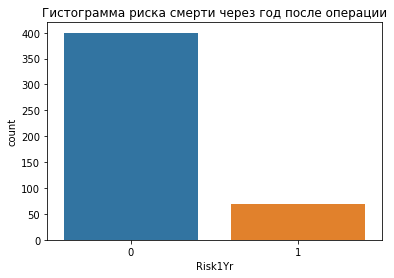

In [ ]:
ax = sns.countplot(x=df['Risk1Yr'])
ax.set_title('Гистограмма риска смерти через год после операции')

Посмотрим какие типы диагнозов ставились

In [ ]:
df['DGN'].value_counts()

DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64

Классы несбалансированы.

Text(0.5, 1.0, 'Кол-во диагнозов различных типов')

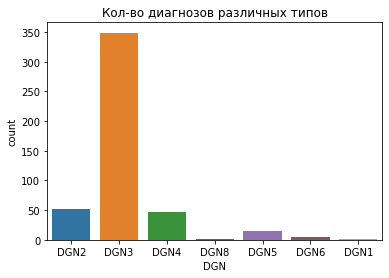

In [ ]:
ax = sns.countplot(x=df['DGN'])
ax.set_title('Кол-во диагнозов различных типов')

Чаще всего ставился диагноз №3

Удалим данные с теми диагнозами, количество наблюдений которых слишком мало. Обучить модель на 1-2 примерах мы не сможем, попробуем предсказывать диагнозы 2,3,4,5

In [ ]:
for dgn in ['DGN1','DGN8','DGN6']:
    df = df.drop(df[df['DGN'] == dgn].index)

In [ ]:
#diagnoses = ['DGN1','DGN8','DGN6','DGN5']
#for diagnos in diagnoses:
#    df.DGN = np.where(df.DGN == diagnos, 'DGN0',df.DGN)

Text(0.5, 1.0, 'Кол-во диагнозов различных типов')

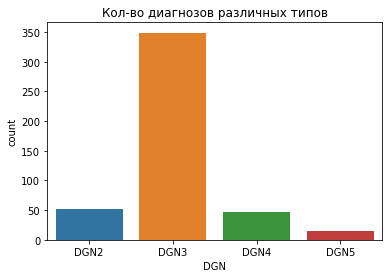

In [ ]:
ax = sns.countplot(x=df['DGN'])
ax.set_title('Кол-во диагнозов различных типов')

Посмотрим на распределения численных признаков.

PRE4: Forced vital capacity - FVC (numeric) (Жизненная ёмкость лёгких — максимальный объём воздуха, который может быть набран в лёгкие после максимально полного выдоха.)

Text(0.5, 0.98, 'Гистограмма значений FVC - Жизненная ёмкость лёгких')

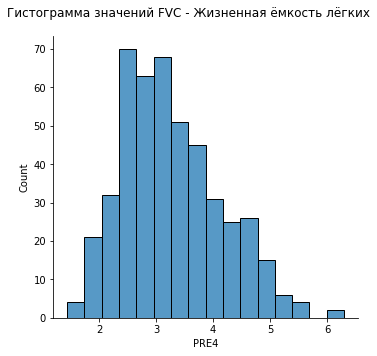

In [ ]:
ax = sns.displot(x=df['PRE4'])
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Гистограмма значений FVC - Жизненная ёмкость лёгких') 

PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric) (ОФВ1 - объём форсированного выдоха за 1 секунду - объём воздуха, выдохнутого в течение первой секунды форсированного выдоха.)

Text(0.5, 0.98, 'Гистограмма значений FEV1')

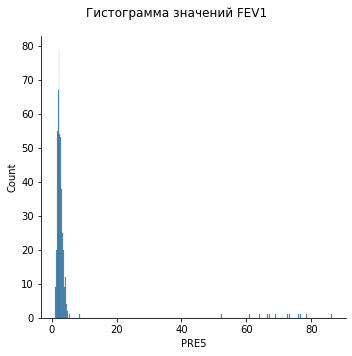

In [ ]:
ax = sns.displot(x=df['PRE5'])
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Гистограмма значений FEV1') 

В данных присутствуют выбросы. Видимо это ошибка в данных, так как данный параметр измеряется в литрах- какой объем воздуха человек выдыхает за 1 секунду. Очевидно, что человек не может за 1 секунду выдохнуть 60-80 литров воздуха.
Согласно Википедии, средний объем легких у взрослого человека- 3-4 л. У пловцов до 6.2 л.

Посмотрим, сколько записей в датасете содержать ошибочные данные.

In [ ]:
df.loc[df['PRE5'] > 6.2]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
25,DGN5,4.56,72.80,PRZ0,1,1,0,1,0,OC12,0,0,0,1,0,57,0
89,DGN3,2.83,66.40,PRZ1,1,1,1,1,0,OC12,0,0,0,1,0,75,0
98,DGN3,2.63,67.30,PRZ1,0,0,1,1,0,OC11,0,0,0,1,0,54,0
112,DGN3,3.68,64.10,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,60,0
132,DGN2,2.50,71.10,PRZ0,0,0,1,0,0,OC13,0,0,0,1,0,64,1
215,DGN2,2.66,8.56,PRZ1,0,1,0,1,0,OC12,0,0,0,1,0,61,0
255,DGN3,3.72,78.30,PRZ0,1,0,0,1,0,OC12,0,0,0,1,0,44,0
319,DGN3,2.10,69.10,PRZ0,0,0,0,0,0,OC11,0,0,0,1,0,62,0
325,DGN4,5.03,79.30,PRZ1,0,0,1,0,0,OC11,0,0,0,0,0,38,0
330,DGN2,2.94,76.00,PRZ1,0,1,1,1,0,OC12,0,0,0,0,0,61,0


In [ ]:
#удалим 15 строк, где FEV1 > 6.2
df = df.drop(df[df['PRE5'] >6.2].index)

Text(0.5, 0.98, 'Гистограмма значений FEV1 после удаления аномальных данных')

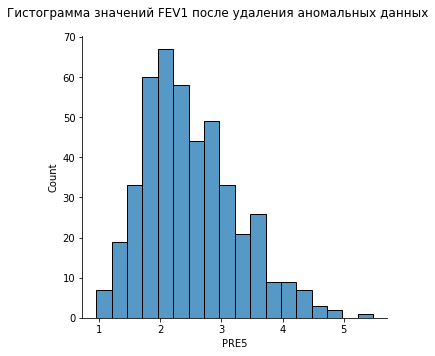

In [ ]:
#еще раз посмотрим на распределение FEV1, после удаления строк с некорректными данными
ax = sns.displot(x=df['PRE5'])
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Гистограмма значений FEV1 после удаления аномальных данных') 

Text(0.5, 0.98, 'Гистограмма распределения возраста пациентов')

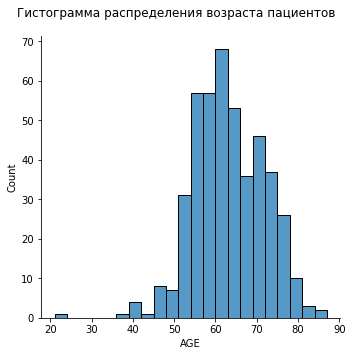

In [ ]:
ax = sns.displot(x=df['AGE'])
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Гистограмма распределения возраста пациентов') 

Text(0.5, 1.0, 'Performance status')

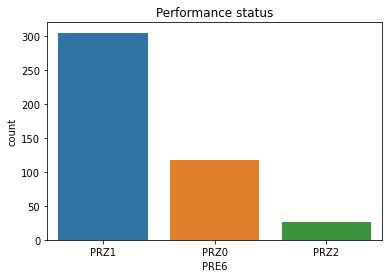

In [ ]:
#PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
#В википедии написано, что данный параметр измеряется от 0 до 5, где 0 - полностью здоров, 5-смерть
ax = sns.countplot(x=df['PRE6'])
ax.set_title('Performance status')

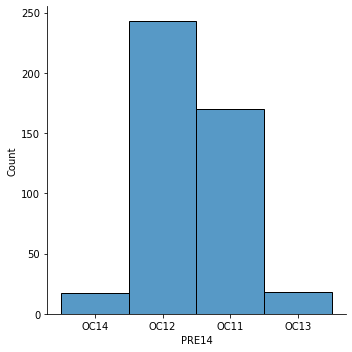

In [ ]:
ax = sns.displot(x=df['PRE14'])
#ax.set_title('Кол-во диагнозов различных типов')

Одним из важных показателей в спирометрии является отношение ОФВ1/ФЖЕЛ (в наших данных PRE4 и PRE5)
(индекс Тиффно — является чувствительным индексом наличия или отсутствия ухудшения проходимости дыхательных путей. в норме 75-80 %. (с)википедия)
Добавим в датасет столбец с данными

In [ ]:
df['TIFF'] = df['PRE5']/df['PRE4']

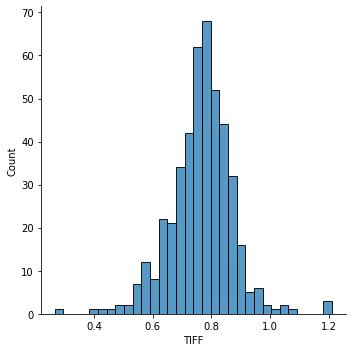

In [ ]:
ax = sns.displot(x=df['TIFF'])

Данный показатель не может быть больше 1, так как мы делим объем воздуха, который пациент выдыхает за 1 секунду на его же"рабочий" объем легких. Логично предположить что человек не способен выдохнуть больше воздуха, чем помещается в его легкие.
Проверим, где в данных PRE5 > PRE4

In [ ]:
df.loc[df['PRE4']<df['PRE5']]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr,TIFF
11,DGN3,4.28,4.44,PRZ1,0,0,0,0,0,OC12,0,0,0,1,0,58,0,1.037383
77,DGN3,3.04,3.60,PRZ1,0,0,0,1,0,OC12,0,0,0,1,0,62,1,1.184211
154,DGN3,3.12,3.24,PRZ1,0,0,0,1,0,OC12,0,0,0,1,0,68,0,1.038462
183,DGN3,2.80,3.36,PRZ1,0,0,0,1,0,OC12,0,0,0,1,0,56,0,1.200000
203,DGN2,3.60,3.92,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,56,0,1.088889
254,DGN3,3.44,3.52,PRZ1,1,0,0,0,0,OC11,0,0,0,1,0,62,0,1.023256
395,DGN4,3.04,3.68,PRZ1,0,0,0,1,0,OC11,1,0,0,1,0,64,0,1.210526


In [ ]:
#удалим строки с некорректными данными
df = df.drop(df[df['PRE4'] < df['PRE5']].index)

In [ ]:
#Будем использовать one-hot-encoding для кодирования категориальных данных (Хотя для кодирования performance status можно было использовать label encoding)
df_encoded = pd.get_dummies(df,columns = ['PRE6', 'PRE14'])

In [ ]:
#закодируем целевую переменную, удалив DGN из строк
df_encoded['DGN'] = df['DGN'].str[-1:].astype(int)

In [ ]:
#признаки
df_encoded.columns

Index(['DGN', 'PRE4', 'PRE5', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr', 'TIFF',
       'PRE6_PRZ0', 'PRE6_PRZ1', 'PRE6_PRZ2', 'PRE14_OC11', 'PRE14_OC12',
       'PRE14_OC13', 'PRE14_OC14'],
      dtype='object')

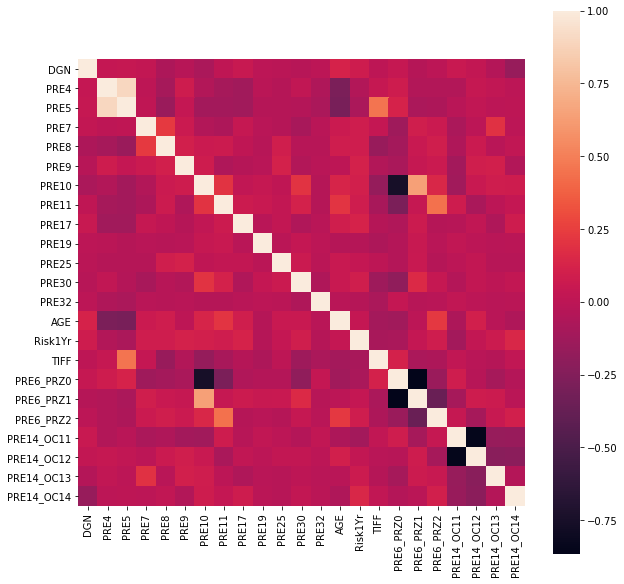

In [ ]:
#построим таблицу корреляции
plt.subplots(figsize=(10,10))
sns.heatmap(df_encoded.corr(), square=True)
plt.show()

In [ ]:
X = df_encoded.drop('DGN',axis=1)
y = df_encoded['DGN']

In [ ]:
#Нормализуем наши данные
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

### 3. PCA

In [ ]:
pca_2 = PCA(n_components=2)
principalComponents = pca_2.fit_transform(X)
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

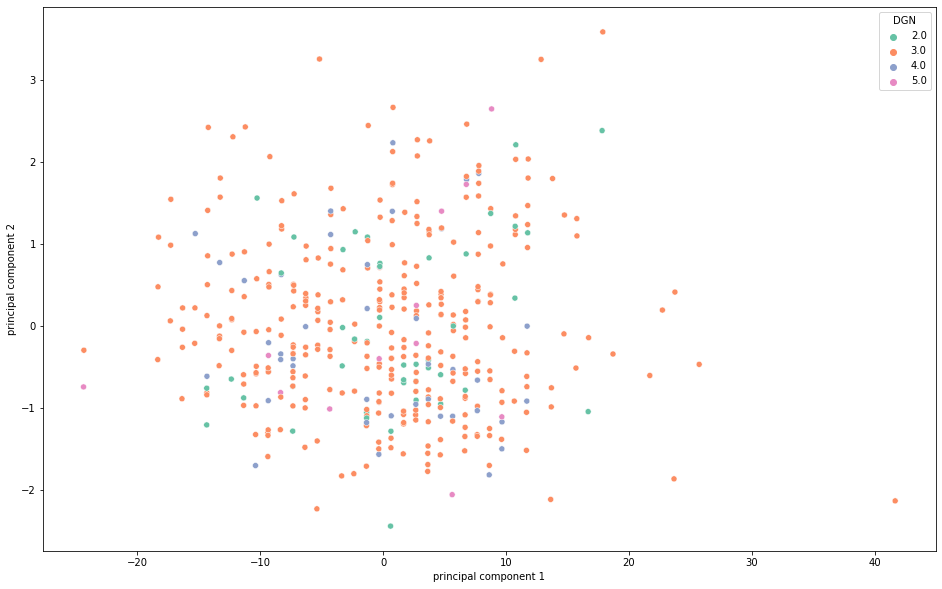

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue=y,
    palette=sns.color_palette("Set2", 4),
    data=principal_Df,
    legend="full",
    alpha=1
)

### 4. Data augmentation : SMOTE,ADASYN, Tomen links

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks

In [ ]:
#Разделим выборку
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y )
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (352, 22)
y_train dataset:  (352,)
X_test dataset:  (89, 22)
y_test dataset:  (89,)


In [ ]:
# remove Tomek links

#удаление данных ухудшило результат, датасет и так очень маленький
'''
tl = TomekLinks(sampling_strategy = 'majority') #поскольку у нас один из классов представлен лучше остальных, будем убирать примеры из него
X_train_tl, y_train_tl = tl.fit_sample(X_train, y_train)
'''

"\ntl = TomekLinks(sampling_strategy = 'majority') #поскольку у нас один из классов представлен лучше остальных, будем убирать примеры из него\nX_train_tl, y_train_tl = tl.fit_sample(X_train, y_train)\n"

In [ ]:
y_train.value_counts()

3    268
2     38
4     35
5     11
Name: DGN, dtype: int64

In [ ]:
print("Before OverSampling, y_train values:\n",(y_train.value_counts()))

sm = SMOTE(random_state=42) #,sampling_strategy='minority')
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

augm = ADASYN(random_state=42)
X_train_as, y_train_as = augm.fit_resample(X_train, y_train)

print('\nAfter smote OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After smote OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After SMOTE OverSampling, y_train values:\n",(y_train_sm.value_counts()))

print('\nAfter adasyn OverSampling, the shape of train_X: {}'.format(X_train_as.shape))
print('After adasyn OverSampling, the shape of train_y: {} \n'.format(y_train_as.shape))

print("After ADASYN OverSampling, y_train values:\n",(y_train_as.value_counts()))

Before OverSampling, y_train values:
 3    268
2     38
4     35
5     11
Name: DGN, dtype: int64

After smote OverSampling, the shape of train_X: (1072, 276)
After smote OverSampling, the shape of train_y: (1072,) 

After SMOTE OverSampling, y_train values:
 2    268
3    268
4    268
5    268
Name: DGN, dtype: int64

After adasyn OverSampling, the shape of train_X: (1052, 276)
After adasyn OverSampling, the shape of train_y: (1052,) 

After ADASYN OverSampling, y_train values:
 5    270
3    268
4    259
2    255
Name: DGN, dtype: int64


### 5. Models

##### 5.1 KNN

In [ ]:
knn = KNeighborsClassifier()
# Зададим сетку - среди каких значений выбирать наилучший параметр.
random_grid = {'n_neighbors': np.array(np.linspace(1, 20, 1), dtype='int'),
           'weights': ['uniform', 'distance'] } #,
            # 'metric': ['EuclideanDistance', 'ManhattanDistance']} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)
rs = RandomizedSearchCV(knn, random_grid, cv=5)
rs.fit(X_train_sm, y_train_sm)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([1]),
                                        'weights': ['uniform', 'distance']})

In [ ]:
print(rs.best_params_, rs.best_score_)

{'weights': 'uniform', 'n_neighbors': 1} 0.8759574005650945


In [ ]:
clf_knn = KNeighborsClassifier(**rs.best_params_)
clf_knn.fit(X_train_sm, y_train_sm)
knn_pred = clf_knn.predict(X_test)

In [ ]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           2       0.20      0.11      0.14        19
           3       0.66      0.80      0.73        56
           4       0.11      0.17      0.13         6
           5       0.00      0.00      0.00         8

    accuracy                           0.54        89
   macro avg       0.24      0.27      0.25        89
weighted avg       0.47      0.54      0.50        89



##### 5.2 Logistic Regression

In [ ]:
# Зададим сетку - среди каких значений выбирать наилучший параметр.
lr_param_grid = {
    "C":list(np.linspace(0.01,1,40)), 
    "penalty":["l1","l2"], 
    "solver" : ['lbfgs', 'liblinear']
}
rs = RandomizedSearchCV(LogisticRegression(), lr_param_grid, cv=5)
rs.fit(X_train_sm, y_train_sm)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.03538461538461538,
                                              0.06076923076923077,
                                              0.08615384615384615,
                                              0.11153846153846153,
                                              0.13692307692307693,
                                              0.16230769230769232,
                                              0.18769230769230769,
                                              0.21307692307692308,
                                              0.23846153846153847,
                                              0.26384615384615384,
                                              0.28923076923076924,
                                              0.31461538461538463, 0.34,
                                              0.36538461538461536,
                                              0.390769230769

In [ ]:
rs.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.8476923076923076}

In [ ]:
lr = LogisticRegression(**rs.best_params_)
lr.fit(X_train_sm,y_train_sm)
lr_pred = lr.predict(X_test)

In [ ]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           2       0.10      0.07      0.08        15
           3       0.44      0.75      0.56        40
           4       0.22      0.12      0.15        17
           5       0.00      0.00      0.00        17

    accuracy                           0.37        89
   macro avg       0.19      0.23      0.20        89
weighted avg       0.26      0.37      0.29        89



##### 5.3 SVM

In [ ]:
# Зададим сетку - среди каких значений выбирать наилучший параметр.
svm_param_grid = {'C': np.array(np.linspace(1, 100, 5), dtype='int') ,
            'kernel': ['poly','rbf','sigmoid'],
            'decision_function_shape' : ['ovo','ovr']}
            #'metric': ['EuclideanDistance', 'ManhattanDistance']} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)
rs = RandomizedSearchCV(SVC(), svm_param_grid, cv=5)
rs.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([  1,  25,  50,  75, 100]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']})

In [ ]:
print(rs.best_params_, rs.best_score_)

{'kernel': 'rbf', 'decision_function_shape': 'ovr', 'C': 75} 0.901160617257118


In [ ]:
svm_clf = SVC(**rs.best_params_)
svm_clf.fit(X_train_sm, y_train_sm)
svm_pred = svm_clf.predict(X_test)

In [ ]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           2       0.10      0.06      0.07        17
           3       0.75      0.81      0.78        63
           4       0.22      0.40      0.29         5
           5       0.00      0.00      0.00         4

    accuracy                           0.61        89
   macro avg       0.27      0.32      0.28        89
weighted avg       0.56      0.61      0.58        89



Из отчетов классификации видно, что ни один из классификаторов не смог настроится на распознание самого малочисленного класса. Возможно стоило его так же удалить и классифицировать оставшиеся 3 класса

##### 5.4 Polynoms

In [ ]:
PolynomialFeatures
trans = PolynomialFeatures(degree=2)
X_pol = trans.fit_transform(X)

In [ ]:
X_pol.shape

(441, 276)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=42, stratify=y )

In [ ]:
# Зададим сетку - среди каких значений выбирать наилучший параметр.
svm_param_grid = {'C': np.array(np.linspace(1, 100, 5), dtype='int') ,
            'kernel': ['poly','rbf','sigmoid'],
            'decision_function_shape' : ['ovo','ovr']}
            #'metric': ['EuclideanDistance', 'ManhattanDistance']} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)
rs = RandomizedSearchCV(SVC(), svm_param_grid, cv=5)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([  1,  25,  50,  75, 100]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']})

In [ ]:
svm_clf = SVC(**rs.best_params_)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [ ]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       1.00      0.76      0.87        89
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.76        89
   macro avg       0.25      0.19      0.22        89
weighted avg       1.00      0.76      0.87        89



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Без семплирования алгорим классификации показывает лучший результат, просто всегда предсказывая самый популярный класс.

Попробуем SVM с полиномиальными признами на данных после oversampling

In [ ]:
X_train_pol_sm, y_train_pol_sm = sm.fit_resample(X_train, y_train)

In [ ]:
 y_train_pol_sm.value_counts()

2    268
3    268
4    268
5    268
Name: DGN, dtype: int64

In [ ]:
# Зададим сетку - среди каких значений выбирать наилучший параметр.
svm_param_grid = {'C': np.array(np.linspace(1, 100, 5), dtype='int') ,
            'kernel': ['poly','rbf','sigmoid'],
            'decision_function_shape' : ['ovo','ovr']}
            #'metric': ['EuclideanDistance', 'ManhattanDistance']} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)
rs = RandomizedSearchCV(SVC(), svm_param_grid, cv=5)
rs.fit(X_train_pol_sm, y_train_pol_sm)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([  1,  25,  50,  75, 100]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']})

In [ ]:
svm_clf = SVC(**rs.best_params_)
svm_clf.fit(X_train_pol_sm, y_train_pol_sm)
svm_pred = svm_clf.predict(X_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           2       0.40      0.16      0.23        25
           3       0.25      0.77      0.38        22
           4       0.44      0.17      0.24        24
           5       0.50      0.06      0.10        18

    accuracy                           0.29        89
   macro avg       0.40      0.29      0.24        89
weighted avg       0.40      0.29      0.24        89



##### 5.5 Random Forest

In [ ]:
param_grid = {
    'max_depth': [i for i in range(3, 10)],
    'min_samples_split': [i for i in range(2, 10)],
    'max_features': [i for i in range(2,5)],
    'criterion' : ['gini', 'entropy'],
    'bootstrap':[True, False],
    'min_samples_leaf': [i for i in range(1,5)]
}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
rs = RandomizedSearchCV(RandomForestClassifier(), param_grid, verbose=2, n_jobs=-1)
rs.fit(X_train_sm, y_train_sm)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print()
rs.best_params_, rs.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.5s finished


({'min_samples_split': 3,
  'min_samples_leaf': 3,
  'max_features': 4,
  'max_depth': 9,
  'criterion': 'entropy',
  'bootstrap': False},
 0.860173875244512)

In [ ]:
rf_reg = RandomForestClassifier(**rs.best_params_)
rf_reg.fit(X_train_sm, y_train_sm)
pred_rf = rf_reg.predict(X_test)
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.87      0.75      0.80        79
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4

    accuracy                           0.66        89
   macro avg       0.22      0.19      0.20        89
weighted avg       0.77      0.66      0.71        89

